In [1]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import vaex
import seaborn as sns


%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from utils import compute_R_fast
from utils import compute_R, compute_R_over_time,compute_R_correctly, compute_R_over_time_correctly
from utils import extract_digit
#from utils import compute_R_over_time

#events = pd.read_parquet("../fbd/data/clean/intraday/SPY.P_2010.parquet")
#events.set_index("index",inplace=True)

## we may need to collapse trades with exactly the same (bid,ask,trade price) together to reduce computational load and make things easier
## often these trade are a result of one big trade being chunked

# available one liner to aggregate trades
#! events =  events.groupby(["bid","ask","trade.price"])["trade.volume"].aggregate(["idxmin","sum"]).reset_index().rename(columns={"sum":"trade.volume"})


#events= compute_trade_sign(events)

df = vaex.open("data/clean/DOW/BA-events_w_s.arrow")
events = df.to_pandas_df()
events.set_index("index",inplace=True)


In [5]:
compute_R_over_time_correctly(events=events.iloc[0:100000], k=1, tau_max=1000)

/home/harold/miniconda3/envs/fbd/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38547 instead
  warnings.warn(


trade_sign  digit
BUY         0        [0.0, 0.00043743273653383893, 0.00093896277383...
            1        [0.0, 0.0018126840241031415, 0.001775240907677...
            2        [0.0, 0.0006989444609946129, 0.001617428592102...
            3        [0.0, 0.0005717118565823101, 0.000330802484957...
            4        [0.0, 0.0005931915370225271, 0.001961121013145...
            5        [0.0, 0.0013843007049575147, 0.001777669289994...
            6        [0.0, 0.002149569011055244, 0.0031754265055306...
            7        [0.0, 0.0011785370791385348, 0.002838669223159...
            8        [0.0, 0.001274775016611398, 0.0025231307606605...
            9        [0.0, 0.001009019333816812, 0.0015130790495332...
SELL        0        [0.0, 0.0011184196394350534, 0.002229801809931...
            1        [0.0, 0.0008757479397778962, 0.002485879633454...
            2        [0.0, 0.0008817288672950936, 0.002117786368187...
            3        [0.0, 0.0008582726985932754, 0.0018134

In [24]:
events["unit_digit"] = pd.Categorical(extract_digit(events, k=1))
events["trade_sign"] = pd.Categorical(events["s"].apply(lambda x : "BUY" if x == 1 else "SELL"))


response_functions = events.groupby(["trade_sign", "unit_digit"]).apply(
                lambda x: compute_R_over_time(x, tau_max=200)
            )

response_functions

trade_sign  unit_digit
BUY         0             [-2.4869026026853782e-14, 0.000115471643989046...
            1             [2.2677946323040612e-13, 6.152531041072613e-05...
            2             [-8.58528060546603e-14, 0.0001017418563154965,...
            3             [2.7857342785871363e-13, 5.972343600336688e-05...
            4             [-6.013782828995552e-14, -4.874572645759606e-0...
            5             [-2.5154072613592964e-14, 0.000140868804437793...
            6             [1.696044527689766e-13, 0.00011782674045833169...
            7             [-7.922345188809265e-14, 6.966580198106725e-05...
            8             [2.9534395065818004e-13, -5.561383953915344e-0...
            9             [-6.892891709021203e-14, -1.6751440057541485e-...
SELL        0             [4.203897990326052e-13, -0.0001418744624707777...
            1             [1.9168604571008623e-13, -8.340351534066518e-0...
            2             [-9.250004280803519e-14, -1.77099043197

In [48]:
type(response_functions)

pandas.core.series.Series

In [49]:
index = pd.MultiIndex.from_product([["BUY","SELL"],list(range(10))], names=["trade_sign", "digit"])

test = [np.zeros(200) for i in range(10)] + [np.ones(200) for i in range(10)]

pd.Series(test,index=index)

trade_sign  digit
BUY         0        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
            1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
            2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
            3        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
            4        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
            5        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
            6        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
            7        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
            8        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
            9        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
SELL        0        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
            1        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
            2        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
            3        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

In [39]:
tau_max=200
digits_response ={"BUY":[np.zeros(tau_max) for i in range(10)], "SELL":[np.zeros(tau_max) for i in range(10)]}


pd.DataFrame(digits_response)


,BUY,SELL
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [21]:
a = np.zeros(200)
b= np.ones(200)




array([-0.   , -0.01 , -0.015, -0.015, -0.015, -0.015,  0.015, -0.03 ,
       -0.025, -0.05 , -0.05 ,  0.05 , -0.085,  0.04 , -0.085,  0.045,
       -0.005,  0.005,  0.005,  0.005,  0.005,  0.005,  0.005, -0.05 ,
        0.015, -0.03 , -0.01 , -0.01 ,  0.025,  0.04 , -0.045, -0.045,
        0.055, -0.055,  0.025,  0.025,  0.03 ,  0.025,  0.04 ,  0.035,
       -0.045,  0.04 , -0.035,  0.045,  0.045,  0.045, -0.105, -0.105,
        0.105,  0.105,  0.105, -0.105,  0.085,  0.085, -0.085,  0.085,
        0.085,  0.08 ,  0.08 ,  0.05 ,  0.055, -0.025,  0.065, -0.055,
       -0.035, -0.035,  0.05 ,  0.05 ,  0.105,  0.105, -0.105,  0.105,
        0.105,  0.105,  0.105,  0.105, -0.145,  0.145,  0.145, -0.145,
       -0.135, -0.13 ,  0.05 ,  0.06 ,  0.06 ,  0.06 ,  0.06 , -0.06 ,
       -0.06 , -0.06 , -0.06 , -0.035,  0.035,  0.035,  0.035,  0.04 ,
        0.035,  0.025,  0.025,  0.025,  0.065,  0.075,  0.085,  0.085,
        0.095, -0.095, -0.095, -0.105, -0.12 , -0.12 , -0.085, -0.085,
      

In [14]:

def response(path):
    df = vaex.open(path)
    events = df.to_pandas_df()
    events.set_index("index",inplace=True)

    events["unit_digit"] = pd.Categorical(extract_digit(events, k=1))
    events["trade_sign"] = pd.Categorical(events["s"].apply(lambda x : "BUY" if x == 1 else "SELL"))

    response_functions = events.groupby(["trade_sign", "unit_digit"]).apply(
                    lambda x: compute_R_over_time(x, tau_max=400)
                )
    
    return response_functions

In [15]:
appple_response_functions = response("data/clean/DOW/AAPL-events_w_s.arrow")
ibm_response_functions = response("data/clean/DOW/IBM-events_w_s.arrow")

In [23]:
from functools import reduce

reduce(lambda a,b: a +b, [appple_response_functions, ibm_response_functions])

trade_sign  unit_digit
BUY         0             [-1.6967902961017386e-14, 0.001158309053819689...
            1             [2.294728721887667e-13, 0.0010380268220729137,...
            2             [-1.1607509359247075e-13, 0.001121518253404001...
            3             [2.722922965907966e-13, 0.0004069939109839253,...
            4             [-5.514076810115651e-14, 9.002141519612565e-05...
            5             [-6.877970346835408e-15, 0.000496858867032399,...
            6             [1.5314959147208533e-13, 0.0006773467488948399...
            7             [-1.0164098712270073e-13, 0.001073736335234120...
            8             [2.9266536712129395e-13, 0.0009375658318409357...
            9             [-9.794430727491251e-14, 0.0002887316156532608...
SELL        0             [3.9916607560881696e-13, -0.001800389764519995...
            1             [1.6946028737629283e-13, -0.000593095857237031...
            2             [-8.371619290019746e-14, -0.00058846153

## Average number of trades over all stocks

data/clean/DOW/AAPL-events_w_s.arrow


Text(0.5, 0, 'Average number of trades')

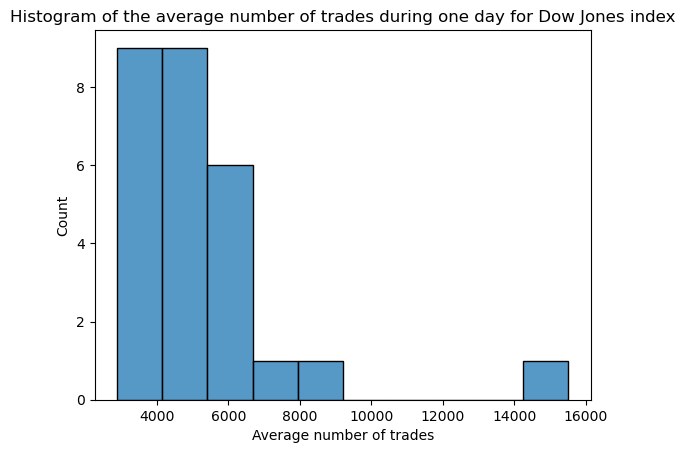

In [115]:
import glob


datasets = glob.glob("data/clean/DOW/*events_w_s.arrow")
num=[]
    ## RESPONSE FUNCTION
for dataset in datasets:
    events = vaex.open(dataset).to_pandas_df()
    events.set_index("index",inplace=True)
    average_num_trades = events.groupby(pd.Grouper(freq="1D", origin='start_day')).size().mean()
    if average_num_trades > 10000:
        print(dataset)
    num.append(average_num_trades)
    

sns.histplot(num)
plt.title("Histogram of the average number of trades during one day for Dow Jones index")
plt.xlabel("Average number of trades")

In [103]:
def compute_R_over_time(events: pd.DataFrame, tau_max=1000):
       
    ## computing for each day, make sure to drop the nan days as there are only 252 trading days
    responses = events.groupby(pd.Grouper(freq="1D", origin='start_day')).apply(lambda x: compute_R_fast(x, tau_max=tau_max))
    
    #keeping only trading days
    
    trading_days = events.index.day_of_year.drop_duplicates()
    trading_days_mask = np.isin(responses.index.day_of_year.to_numpy(), trading_days)

    responses = responses.iloc[trading_days_mask]
    
    max_len = responses.apply(lambda x: len(x)).max()
    
    ## we pad every trading day response function up to max_len viewed (usually equal to tau_max)
    final_response = np.nanmean(np.array([np.pad(a, (0,max_len-a.shape[0]) , mode='constant', constant_values=np.nan) for a in responses.to_numpy()]),axis=0)
    
    return final_response

In [104]:
a = compute_R_over_time(events=events, tau_max=10000)
b = compute_R_fast(events=events, tau_max=10000)

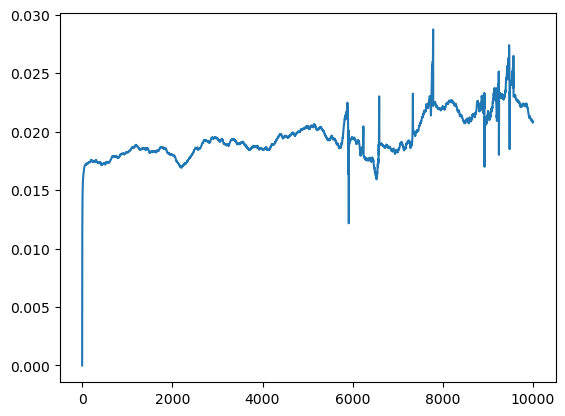

In [105]:
plt.plot(a)




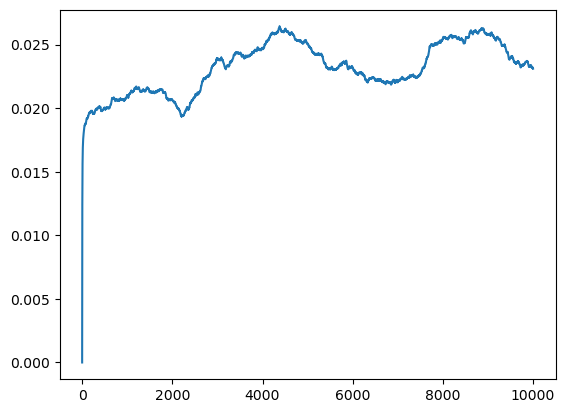

In [106]:
plt.plot(b)